In [107]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


# Load sample dataset
data=pd.read_csv('..//src/data/sleephealth.csv', encoding='latin-1')

# Display the first 5 rows of the dataset
data.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [108]:
df = pd.concat([data, data['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df = df.rename(columns={0: 'BloodPressure Systolic', 1: 'BloodPressure Diastolic'})

df['BloodPressure Systolic'] = df['BloodPressure Systolic'].astype(float)
df['BloodPressure Diastolic'] = df['BloodPressure Diastolic'].astype(float)

In [109]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure Systolic,BloodPressure Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0


In [110]:
df.shape

(374, 14)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
 12  BloodPressure Systolic   374 non-null    float64
 13  BloodPressure Diastolic  374 non-null    float64
dtypes: float64(3), int64(7), o

In [112]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
BloodPressure Systolic       0
BloodPressure Diastolic      0
dtype: int64

In [113]:
# Replace NaN with None in Sleep Disorder Target column
df.loc[df['Sleep Disorder'].isna(), 'Sleep Disorder'] = "Normal"

In [114]:
# Move the target column to the end
df.insert(len(df.columns)-1, 'Sleep Disorder', df.pop('Sleep Disorder'))

In [115]:
df.groupby('Gender')['Sleep Disorder'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

Gender  Sleep Disorder
Female  Normal            44.32%
        Sleep Apnea       36.22%
        Insomnia          19.46%
Male    Normal            72.49%
        Insomnia          21.69%
        Sleep Apnea        5.82%
Name: proportion, dtype: object

In [116]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BloodPressure Systolic,BloodPressure Diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [117]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Daily Steps                  int64
BloodPressure Systolic     float64
BloodPressure Diastolic    float64
Sleep Disorder              object
dtype: object

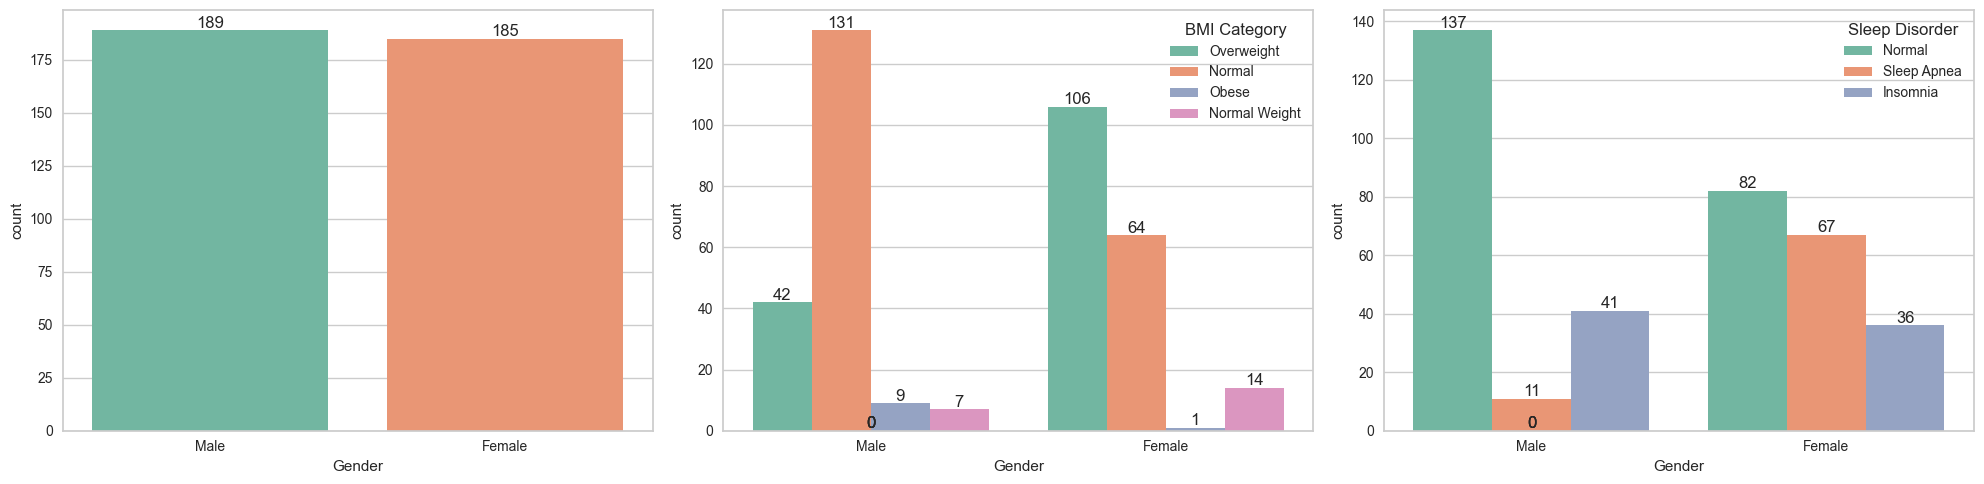

In [118]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(x='Gender', palette='Set2', data=df, ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

sns.countplot(x='Gender', hue='BMI Category', palette='Set2', data=df, ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

sns.countplot(x='Gender', hue='Sleep Disorder', palette='Set2', data=df, ax=ax[2])
for p in ax[2].patches:
    ax[2].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

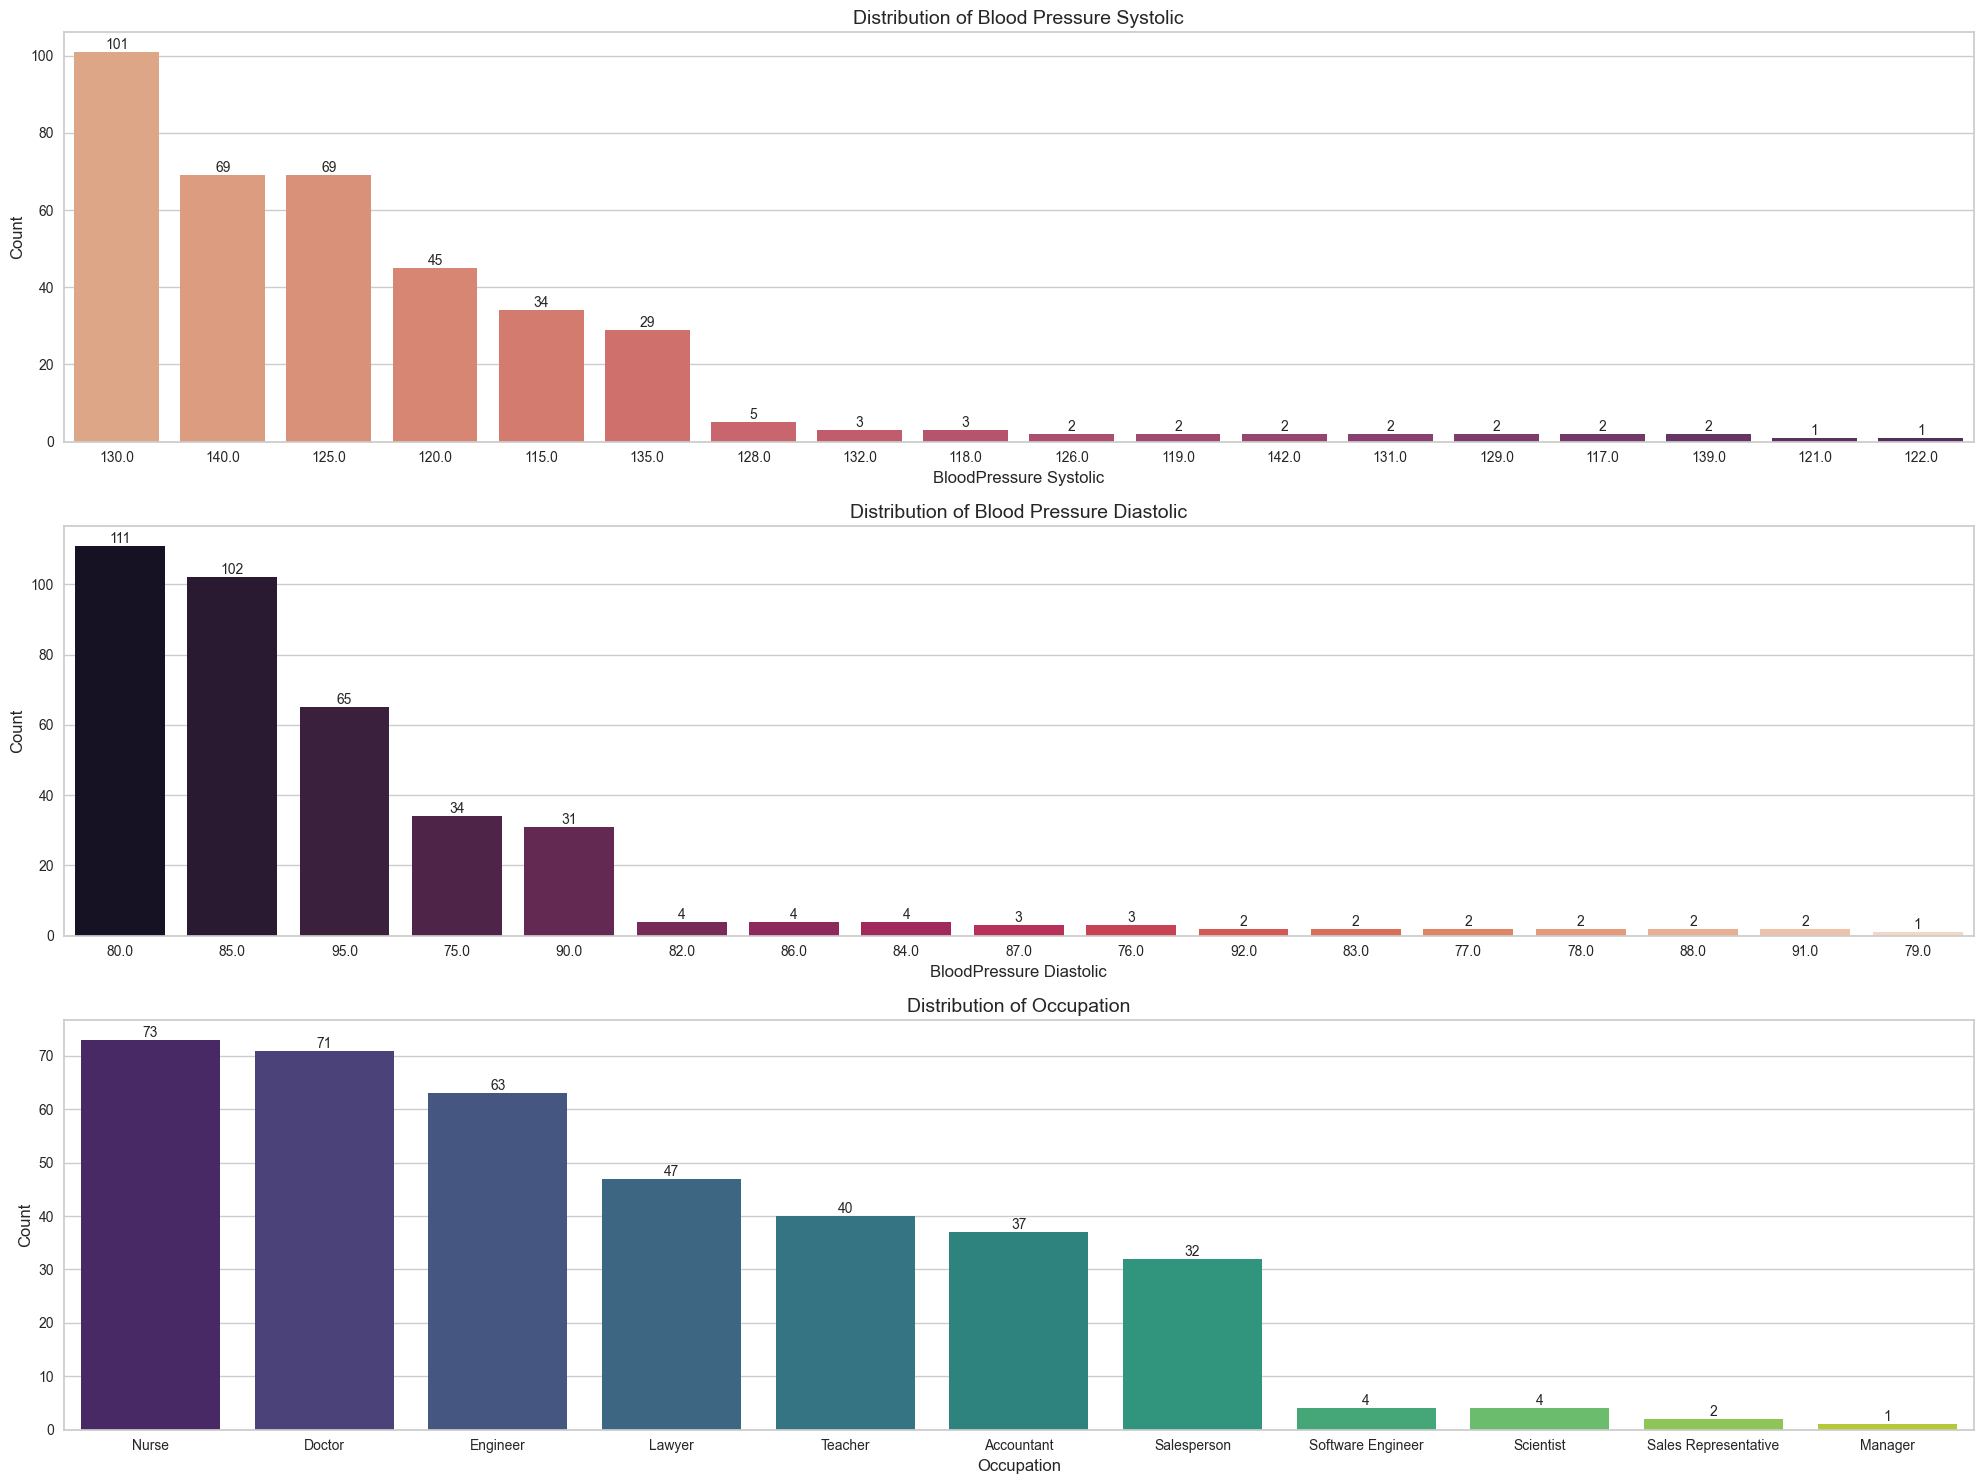

In [119]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

# Countplot for BloodPressure Systolic
bp_order = df['BloodPressure Systolic'].value_counts().index
sns.countplot(x='BloodPressure Systolic', data=df, ax=ax[0], order=bp_order, palette='flare')
ax[0].set_xlabel('BloodPressure Systolic', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Distribution of Blood Pressure Systolic', fontsize=14)
# ax[0].tick_params(axis='x', labelrotation=45)

# Add data labels to count bars
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Countplot for BloodPressure Diastolic
bp_order = df['BloodPressure Diastolic'].value_counts().index
sns.countplot(x='BloodPressure Diastolic', data=df, ax=ax[1], order=bp_order, palette='rocket')
ax[1].set_xlabel('BloodPressure Diastolic', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].set_title('Distribution of Blood Pressure Diastolic', fontsize=14)
# ax[1].tick_params(axis='x', labelrotation=45)

# Add data labels to count bars
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)    
    
# Countplot for Occupation
occupation_order = df['Occupation'].value_counts().index
sns.countplot(x='Occupation', data=df, ax=ax[2], order=occupation_order, palette='viridis')
ax[2].set_xlabel('Occupation', fontsize=12)
ax[2].set_ylabel('Count', fontsize=12)
ax[2].set_title('Distribution of Occupation', fontsize=14)
# ax[2].tick_params(axis='x', labelrotation=45)

# Add data labels to count bars
for p in ax[2].patches:
    ax[2].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

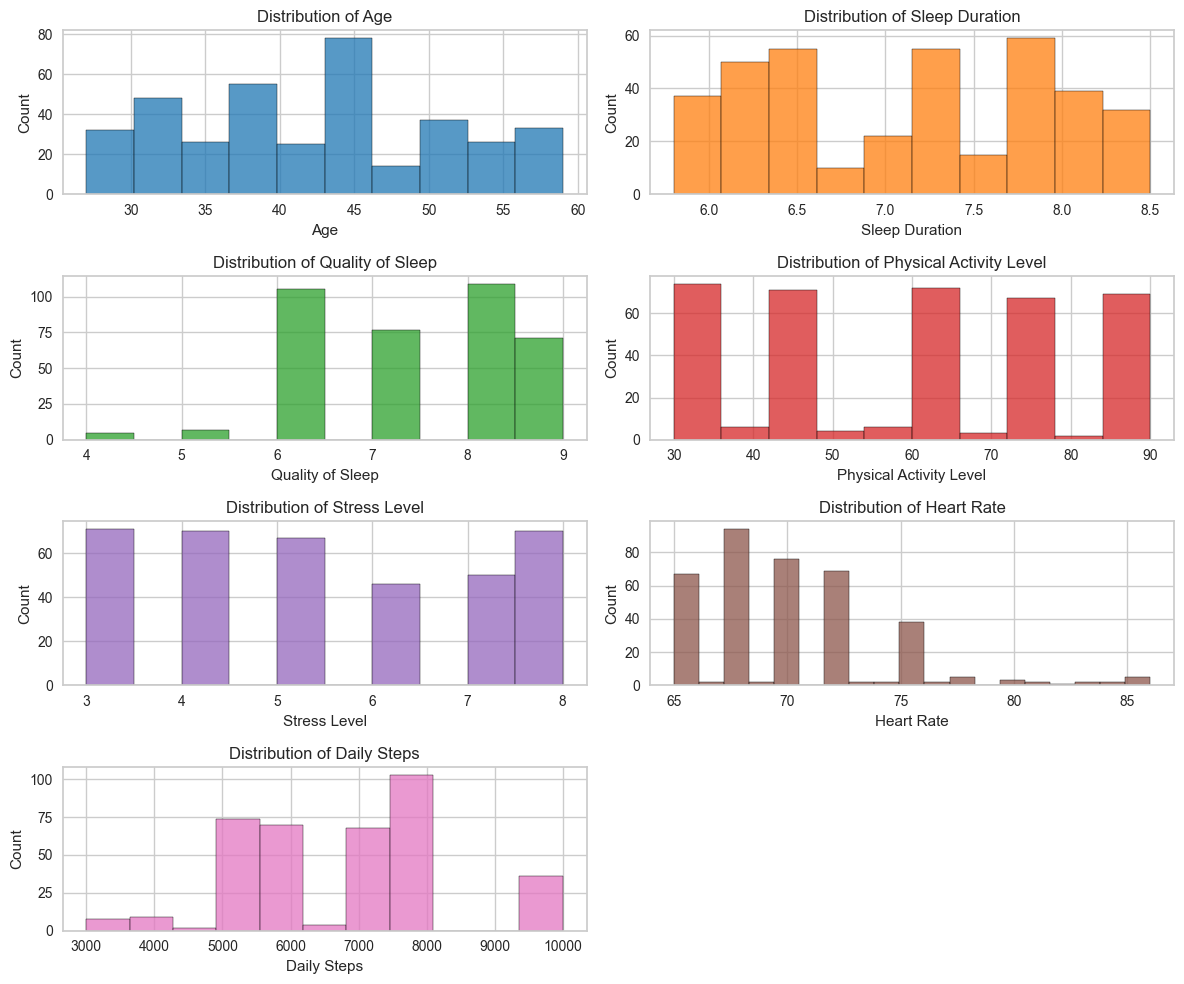

In [120]:
plt.figure(figsize=(12, 10))

plt.subplot(4, 2, 1)
sns.histplot(x=df['Age'], kde=False, color='#1f77b4')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(4, 2, 2)
sns.histplot(x=df['Sleep Duration'], kde=False, color='#ff7f0e')
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')

plt.subplot(4, 2, 3)
sns.histplot(x=df['Quality of Sleep'], kde=False, color='#2ca02c')
plt.title('Distribution of Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')

plt.subplot(4, 2, 4)
sns.histplot(x=df['Physical Activity Level'], kde=False, color='#d62728')
plt.title('Distribution of Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')

plt.subplot(4, 2, 5)
sns.histplot(x=df['Stress Level'], kde=False, color='#9467bd')
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Count')

plt.subplot(4, 2, 6)
sns.histplot(x=df['Heart Rate'], kde=False, color='#8c564b')
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Count')

plt.subplot(4, 2, 7)
sns.histplot(x=df['Daily Steps'], kde=False, color='#e377c2')
plt.title('Distribution of Daily Steps')
plt.xlabel('Daily Steps')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


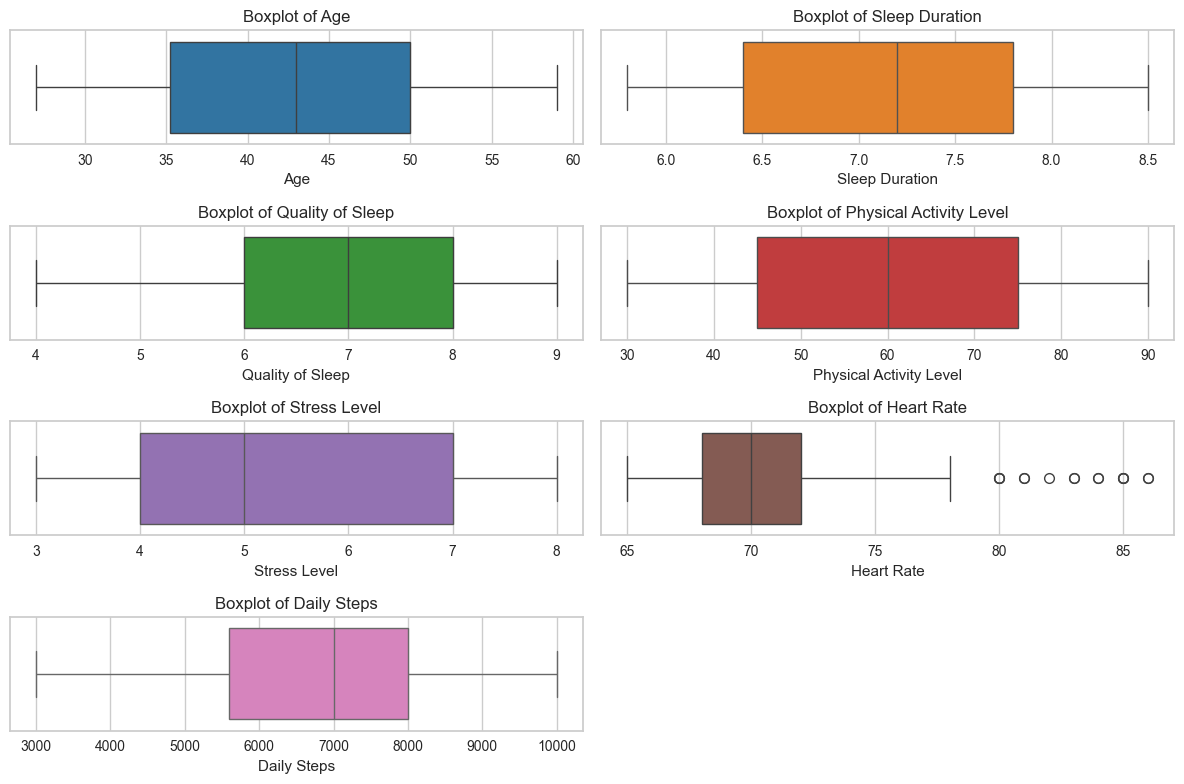

In [121]:
plt.figure(figsize=(12, 8))

plt.subplot(4, 2, 1)
sns.boxplot(x=df['Age'], color='#1f77b4')
plt.title('Boxplot of Age')
plt.xlabel('Age')

plt.subplot(4, 2, 2)
sns.boxplot(x=df['Sleep Duration'], color='#ff7f0e')
plt.title('Boxplot of Sleep Duration')
plt.xlabel('Sleep Duration')

plt.subplot(4, 2, 3)
sns.boxplot(x=df['Quality of Sleep'], color='#2ca02c')
plt.title('Boxplot of Quality of Sleep')
plt.xlabel('Quality of Sleep')

plt.subplot(4, 2, 4)
sns.boxplot(x=df['Physical Activity Level'], color='#d62728')
plt.title('Boxplot of Physical Activity Level')
plt.xlabel('Physical Activity Level')

plt.subplot(4, 2, 5)
sns.boxplot(x=df['Stress Level'], color='#9467bd')
plt.title('Boxplot of Stress Level')
plt.xlabel('Stress Level')

plt.subplot(4, 2, 6)
sns.boxplot(x=df['Heart Rate'], color='#8c564b')
plt.title('Boxplot of Heart Rate')
plt.xlabel('Heart Rate')

plt.subplot(4, 2, 7)
sns.boxplot(x=df['Daily Steps'], color='#e377c2')
plt.title('Boxplot of Daily Steps')
plt.xlabel('Daily Steps')

plt.tight_layout()
plt.show()


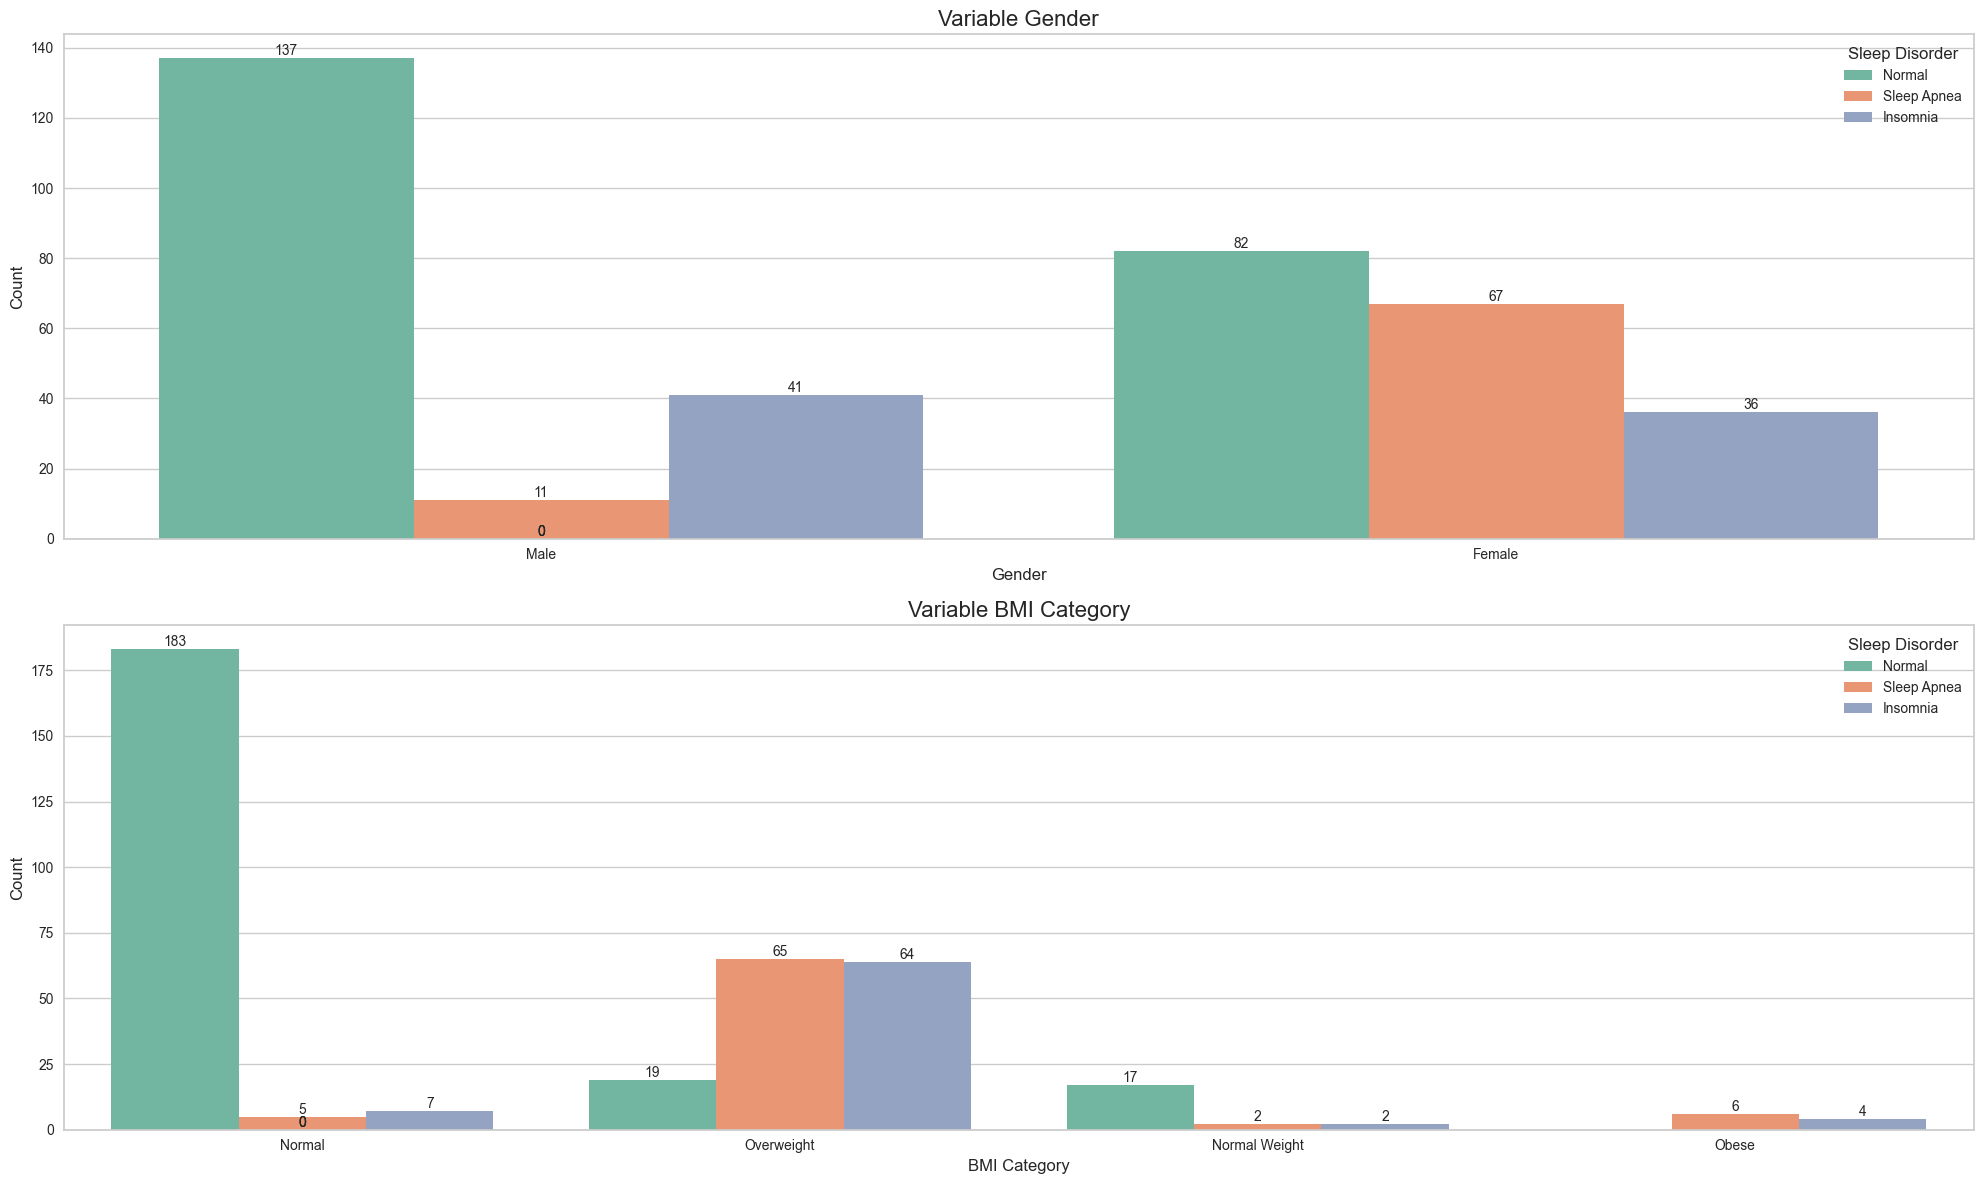

In [122]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 1, 1)
plt.title('Variable Gender', fontsize=16)
gender_order = df['Gender'].value_counts().index
sns.countplot(x='Gender', hue='Sleep Disorder', palette='Set2', data=df, order=gender_order)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
# plt.xticks(fontsize=10, rotation=45)
plt.legend(title='Sleep Disorder', fontsize=10, title_fontsize=12)

# Add data labels to the count bars
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.subplot(2, 1, 2)
plt.title('Variable BMI Category', fontsize=16)
bmi_order = df['BMI Category'].value_counts().index
sns.countplot(x='BMI Category', hue='Sleep Disorder', palette='Set2', data=df, order=bmi_order)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
# plt.xticks(fontsize=10, rotation=45)
plt.legend(title='Sleep Disorder', fontsize=10, title_fontsize=12)

# Add data labels to the count bars
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()


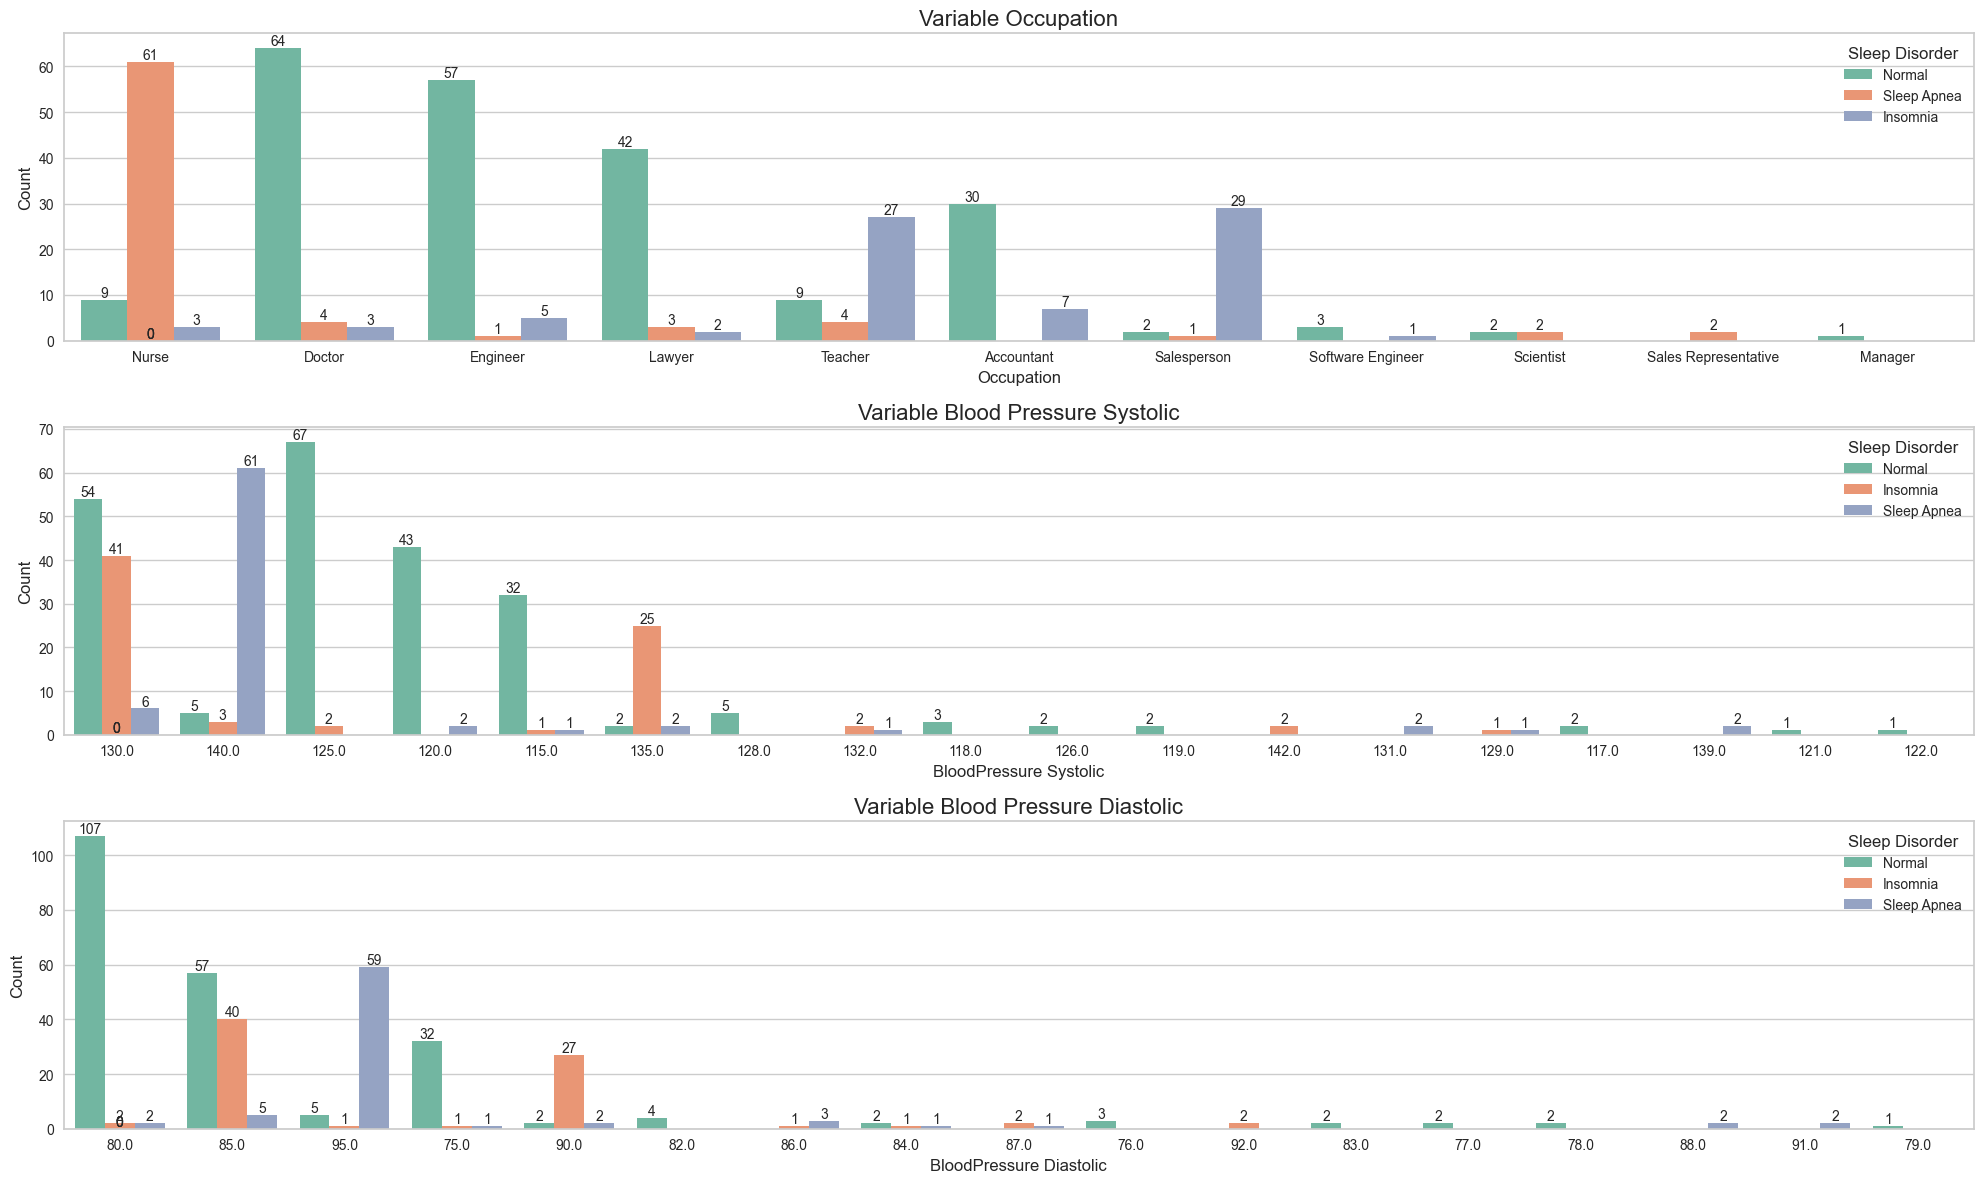

In [123]:
plt.figure(figsize=(20, 12))

plt.subplot(3, 1, 1)
plt.title('Variable Occupation', fontsize=16)
gender_order = df['Occupation'].value_counts().index
sns.countplot(x='Occupation', hue='Sleep Disorder', palette='Set2', data=df, order=gender_order)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
# plt.xticks(fontsize=10, rotation=45)
plt.legend(title='Sleep Disorder', fontsize=10, title_fontsize=12)

# Add data labels to the count bars
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.subplot(3, 1, 2)
plt.title('Variable Blood Pressure Systolic', fontsize=16)
bmi_order = df['BloodPressure Systolic'].value_counts().index
sns.countplot(x='BloodPressure Systolic', hue='Sleep Disorder', palette='Set2', data=df, order=bmi_order)
plt.xlabel('BloodPressure Systolic', fontsize=12)
plt.ylabel('Count', fontsize=12)
# plt.xticks(fontsize=10, rotation=45)
plt.legend(title='Sleep Disorder', fontsize=10, title_fontsize=12)

# Add data labels to the count bars
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.subplot(3, 1, 3)
plt.title('Variable Blood Pressure Diastolic', fontsize=16)
bmi_order = df['BloodPressure Diastolic'].value_counts().index
sns.countplot(x='BloodPressure Diastolic', hue='Sleep Disorder', palette='Set2', data=df, order=bmi_order)
plt.xlabel('BloodPressure Diastolic', fontsize=12)
plt.ylabel('Count', fontsize=12)
# plt.xticks(fontsize=10, rotation=45)
plt.legend(title='Sleep Disorder', fontsize=10, title_fontsize=12)

# Add data labels to the count bars
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)    
    
plt.tight_layout()
plt.show()

In [124]:
df.drop('Person ID', axis = 1, inplace = True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,BloodPressure Systolic,BloodPressure Diastolic,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126.0,83.0,Normal
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125.0,80.0,Normal
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125.0,80.0,Normal
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140.0,90.0,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140.0,90.0,Sleep Apnea


In [125]:
from pycaret.classification import *

In [126]:
# # or Impute the missing values with mode for categorical data
# df['Sleep Disorder'].fillna(df['Sleep Disorder'].mode()[0], inplace=True)

clf = setup(df,
            session_id = 17,
            target = 'Sleep Disorder',
            train_size = 0.8,
            numeric_imputation = 'median',  # Keep this if you used median for imputation
            categorical_imputation = 'mode',  # Keep this if you used mode for imputation
            normalize = True,
            normalize_method = 'zscore'
           )



,Description,Value
0,Session id,17
1,Target,Sleep Disorder
2,Target type,Multiclass
3,Target mapping,"Insomnia: 0, Normal: 1, Sleep Apnea: 2"
4,Original data shape,"(374, 13)"
5,Transformed data shape,"(374, 26)"
6,Transformed train set shape,"(299, 26)"
7,Transformed test set shape,"(75, 26)"
8,Numeric features,9
9,Categorical features,3


In [127]:
get_config('dataset_transformed')

,Gender,Age,Occupation_Doctor,Occupation_Nurse,Occupation_Engineer,Occupation_Scientist,Occupation_Lawyer,Occupation_Salesperson,Occupation_Accountant,Occupation_Teacher,...,Stress Level,BMI Category_Normal,BMI Category_Overweight,BMI Category_Normal Weight,BMI Category_Obese,Heart Rate,Daily Steps,BloodPressure Systolic,BloodPressure Diastolic,Sleep Disorder
11,0.996661,-1.523643,2.016878,-0.490575,-0.448111,-0.100673,-0.358193,-0.308607,-0.346194,-0.346194,...,0.322150,0.944672,-0.83022,-0.213201,-0.143101,-0.044786,0.703845,-1.087130,-0.743061,1
288,-1.003350,0.920023,-0.495816,2.038424,-0.448111,-0.100673,-0.358193,-0.308607,-0.346194,-0.346194,...,1.455360,-1.058569,1.20450,-0.213201,-0.143101,1.195115,1.934904,1.489579,1.677149,2
360,-1.003350,1.967309,-0.495816,2.038424,-0.448111,-0.100673,-0.358193,-0.308607,-0.346194,-0.346194,...,-1.377665,-1.058569,1.20450,-0.213201,-0.143101,-0.540746,0.088315,1.489579,1.677149,2
330,-1.003350,1.269118,-0.495816,-0.490575,2.231591,-0.100673,-0.358193,-0.308607,-0.346194,-0.346194,...,-1.377665,0.944672,-0.83022,-0.213201,-0.143101,-1.284687,-1.142744,-0.442953,-0.743061,1
68,-1.003350,-1.058182,-0.495816,-0.490575,-0.448111,9.933110,-0.358193,-0.308607,-0.346194,-0.346194,...,0.322150,-1.058569,1.20450,-0.213201,-0.143101,1.443096,-0.834979,-0.056446,0.063676,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,0.996661,-1.523643,2.016878,-0.490575,-0.448111,-0.100673,-0.358193,-0.308607,-0.346194,-0.346194,...,1.455360,0.944672,-0.83022,-0.213201,-0.143101,-0.044786,0.703845,-1.087130,-0.743061,1
237,-1.003350,0.221833,-0.495816,-0.490575,-0.448111,-0.100673,-0.358193,-0.308607,-0.346194,2.888555,...,-0.811060,-1.058569,1.20450,-0.213201,-0.143101,-1.284687,-0.527215,0.845402,0.870412,0
205,0.996661,0.105468,-0.495816,-0.490575,2.231591,-0.100673,-0.358193,-0.308607,-0.346194,-0.346194,...,-0.244455,0.944672,-0.83022,-0.213201,-0.143101,-0.044786,0.703845,0.201225,0.063676,1
72,0.996661,-1.058182,2.016878,-0.490575,-0.448111,-0.100673,-0.358193,-0.308607,-0.346194,-0.346194,...,1.455360,0.944672,-0.83022,-0.213201,-0.143101,0.451175,-1.142744,-0.442953,-0.743061,1


In [128]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [129]:
get_config('X_train_transformed')

,Gender,Age,Occupation_Doctor,Occupation_Nurse,Occupation_Engineer,Occupation_Scientist,Occupation_Lawyer,Occupation_Salesperson,Occupation_Accountant,Occupation_Teacher,...,Physical Activity Level,Stress Level,BMI Category_Normal,BMI Category_Overweight,BMI Category_Normal Weight,BMI Category_Obese,Heart Rate,Daily Steps,BloodPressure Systolic,BloodPressure Diastolic
11,0.996661,-1.523643,2.016878,-0.490575,-0.448111,-0.100673,-0.358193,-0.308607,-0.346194,-0.346194,...,0.752794,0.322150,0.944672,-0.83022,-0.213201,-0.143101,-0.044786,0.703845,-1.087130,-0.743061
288,-1.003350,0.920023,-0.495816,2.038424,-0.448111,-0.100673,-0.358193,-0.308607,-0.346194,-0.346194,...,1.481382,1.455360,-1.058569,1.20450,-0.213201,-0.143101,1.195115,1.934904,1.489579,1.677149
360,-1.003350,1.967309,-0.495816,2.038424,-0.448111,-0.100673,-0.358193,-0.308607,-0.346194,-0.346194,...,0.752794,-1.377665,-1.058569,1.20450,-0.213201,-0.143101,-0.540746,0.088315,1.489579,1.677149
330,-1.003350,1.269118,-0.495816,-0.490575,2.231591,-0.100673,-0.358193,-0.308607,-0.346194,-0.346194,...,-1.432972,-1.377665,0.944672,-0.83022,-0.213201,-0.143101,-1.284687,-1.142744,-0.442953,-0.743061
68,-1.003350,-1.058182,-0.495816,-0.490575,-0.448111,9.933110,-0.358193,-0.308607,-0.346194,-0.346194,...,-0.461521,0.322150,-1.058569,1.20450,-0.213201,-0.143101,1.443096,-0.834979,-0.056446,0.063676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-1.003350,0.221833,-0.495816,-0.490575,-0.448111,-0.100673,-0.358193,-0.308607,-0.346194,2.888555,...,-0.704384,-0.811060,-1.058569,1.20450,-0.213201,-0.143101,-1.284687,-0.527215,0.845402,0.870412
117,-1.003350,-0.592722,-0.495816,-0.490575,-0.448111,-0.100673,-0.358193,-0.308607,2.888555,-0.346194,...,0.024205,-0.811060,0.944672,-0.83022,-0.213201,-0.143101,-0.540746,0.088315,-1.731307,-1.549798
228,-1.003350,0.221833,-0.495816,-0.490575,-0.448111,-0.100673,-0.358193,-0.308607,-0.346194,2.888555,...,-0.704384,-0.811060,-1.058569,1.20450,-0.213201,-0.143101,-1.284687,-0.527215,0.845402,0.870412
54,0.996661,-1.174547,2.016878,-0.490575,-0.448111,-0.100673,-0.358193,-0.308607,-0.346194,-0.346194,...,-1.432972,1.455360,0.944672,-0.83022,-0.213201,-0.143101,0.451175,-1.142744,-0.442953,-0.743061


In [130]:
best_f1score_models_top3 = compare_models(sort = 'F1', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9066,0.0000,0.9066,0.9091,0.9050,0.8360,0.8387,0.1890
lr,Logistic Regression,0.9066,0.0000,0.9066,0.9110,0.9049,0.8351,0.8381,1.6120
svm,SVM - Linear Kernel,0.9066,0.0000,0.9066,0.9120,0.9048,0.8359,0.8396,0.0560
rf,Random Forest Classifier,0.8999,0.0000,0.8999,0.9083,0.8989,0.8259,0.8304,0.1300
gbc,Gradient Boosting Classifier,0.8966,0.0000,0.8966,0.9027,0.8958,0.8201,0.8239,0.1940
ridge,Ridge Classifier,0.8966,0.0000,0.8966,0.9015,0.8943,0.8175,0.8210,0.0580
et,Extra Trees Classifier,0.8898,0.0000,0.8898,0.8991,0.8889,0.8071,0.8124,0.1110
lda,Linear Discriminant Analysis,0.8899,0.0000,0.8899,0.8953,0.8877,0.8061,0.8098,0.0680
dt,Decision Tree Classifier,0.8797,0.0000,0.8797,0.8894,0.8798,0.7912,0.7963,0.0490
knn,K Neighbors Classifier,0.8732,0.0000,0.8732,0.8770,0.8716,0.7779,0.7806,0.0670


In [131]:
best_f1score_models_top3

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=17, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=17, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
    

In [132]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9333,0.0000,0.9333,0.9381,0.9341,0.8837,0.8856
1,0.9000,0.0000,0.9000,0.9000,0.8957,0.8125,0.8189
2,0.9333,0.0000,0.9333,0.9333,0.9333,0.8810,0.8810
3,0.9667,0.0000,0.9667,0.9714,0.9664,0.9405,0.9423
4,0.9000,0.0000,0.9000,0.9035,0.8998,0.8171,0.8190
5,0.8333,0.0000,0.8333,0.8593,0.8264,0.7076,0.7180
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8667,0.0000,0.8667,0.8727,0.8648,0.7757,0.7801
8,0.7667,0.0000,0.7667,0.7611,0.7626,0.5930,0.5943


In [133]:
tuned_lr = tune_model(lr, optimize = 'F1', n_iter = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9333,0.0000,0.9333,0.9381,0.9341,0.8837,0.8856
1,0.9000,0.0000,0.9000,0.9000,0.8957,0.8125,0.8189
2,0.9333,0.0000,0.9333,0.9333,0.9333,0.8810,0.8810
3,0.9667,0.0000,0.9667,0.9714,0.9664,0.9405,0.9423
4,0.8667,0.0000,0.8667,0.8667,0.8667,0.7619,0.7619
5,0.8333,0.0000,0.8333,0.8593,0.8264,0.7076,0.7180
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,0.0000,0.9000,0.9021,0.8996,0.8321,0.8338
8,0.7667,0.0000,0.7667,0.7611,0.7626,0.5930,0.5943


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [134]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

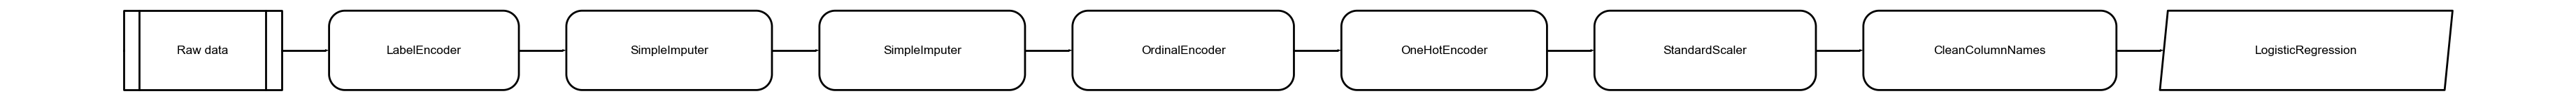




__________   auc   __________


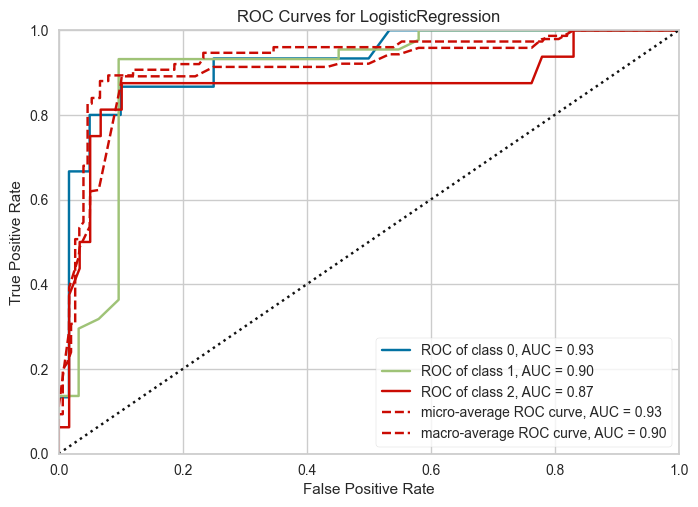




__________   pr   __________


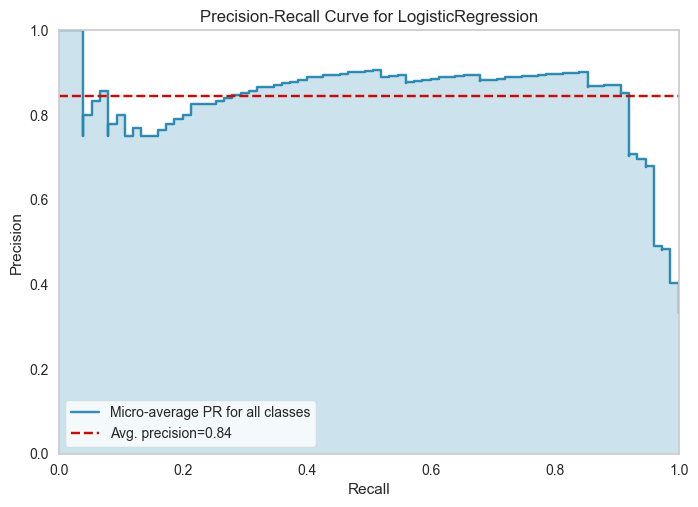




__________   confusion_matrix   __________


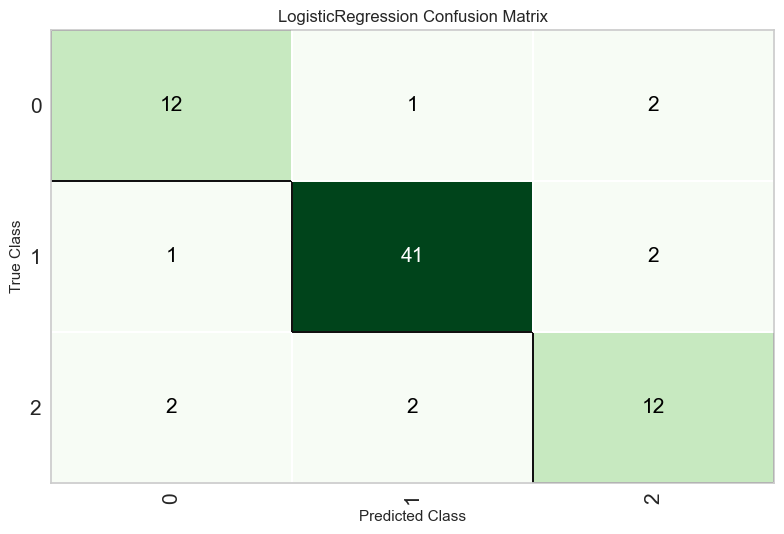




__________   error   __________


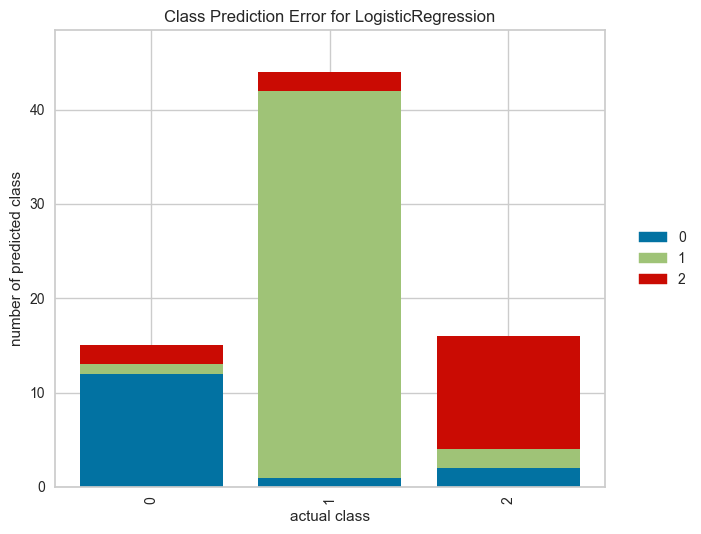




__________   class_report   __________


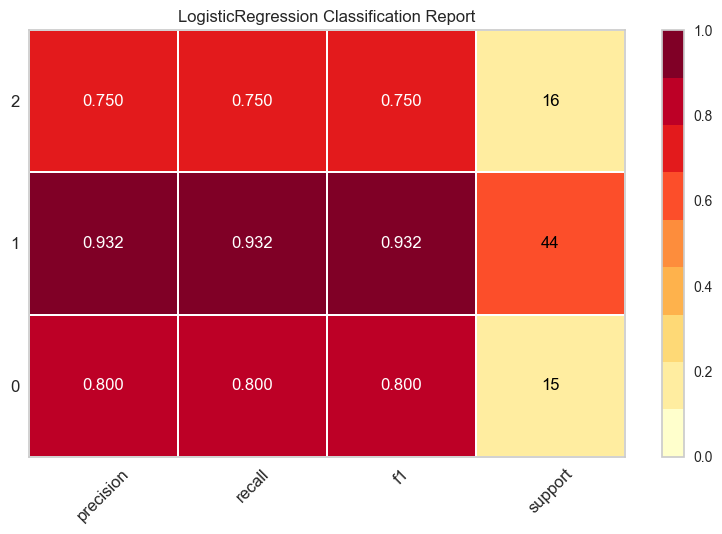




__________   boundary   __________


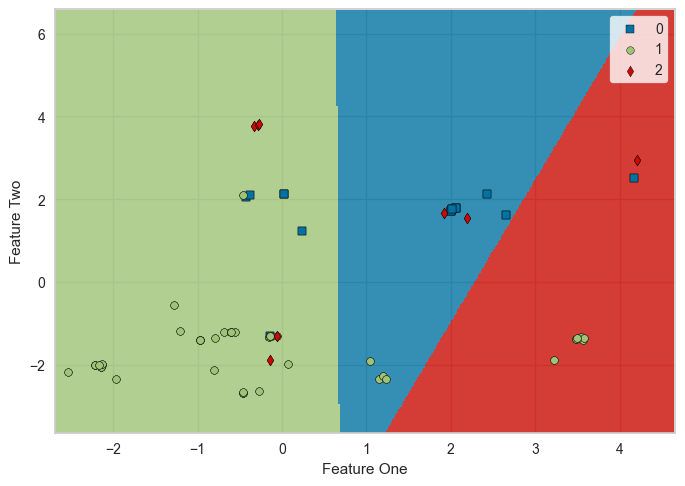




__________   learning   __________


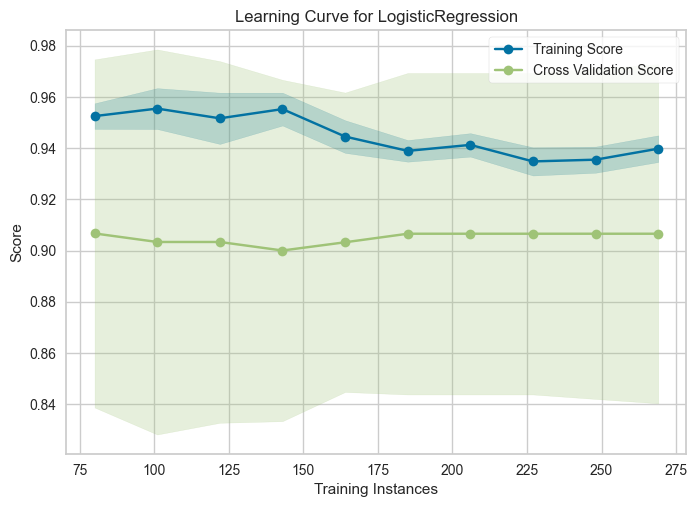




__________   vc   __________


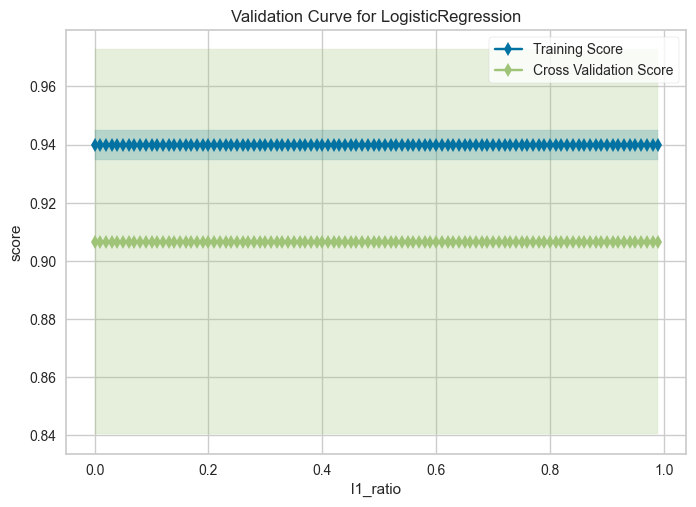




__________   dimension   __________


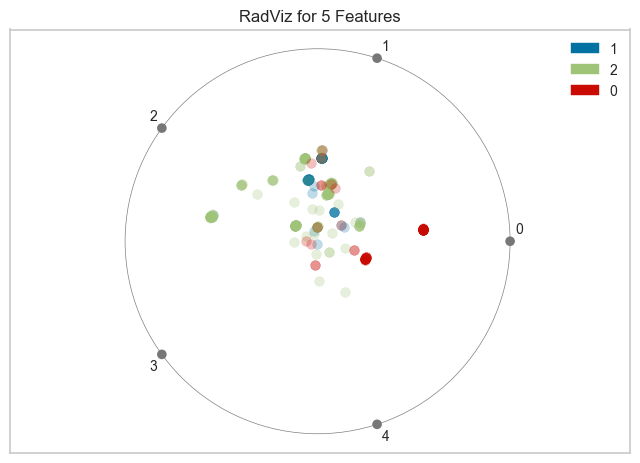




__________   feature_all   __________


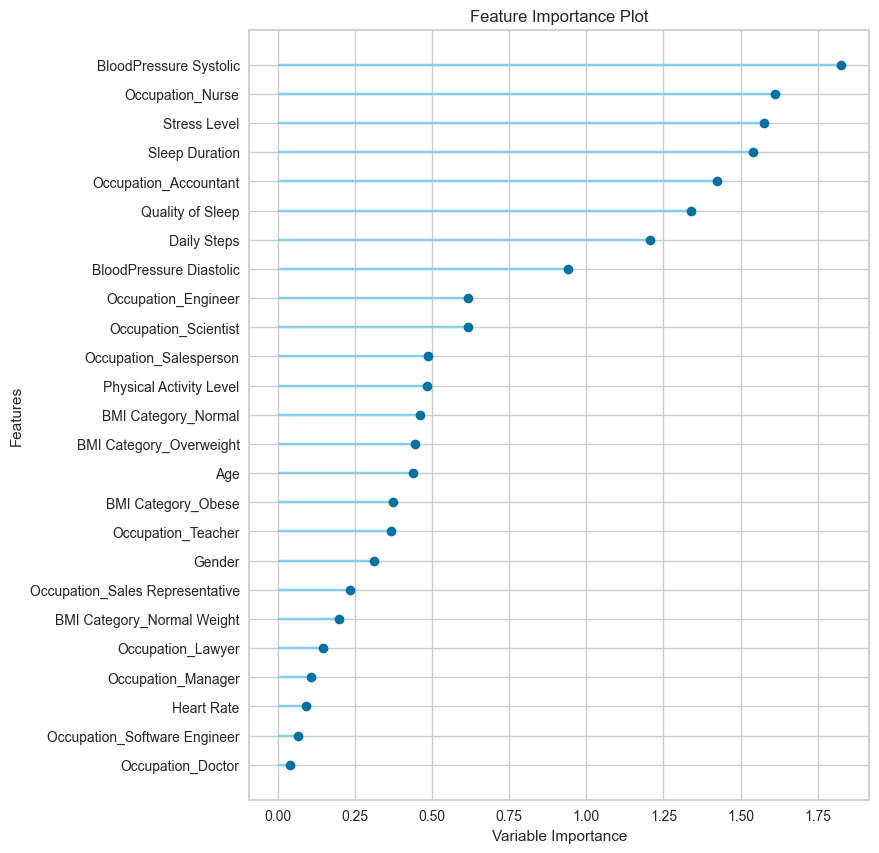




__________   feature   __________


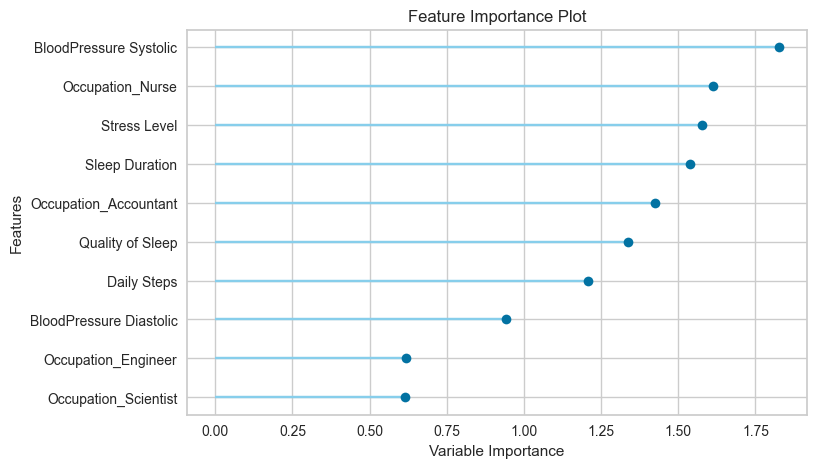




__________   parameter   __________


,Parameters
C,6.916
class_weight,{}
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


In [142]:
available_plots = ['pipeline','auc','pr','confusion_matrix','error','class_report','boundary','learning','vc','dimension','feature_all','feature','parameter']
            
for i in available_plots:
    print('__________  ',i,'  __________',sep=' ')
    plot_model(tuned_lr,plot=i)
    print('\n\n')

In [143]:
# Finalize the model
final_model = clf.finalize_model(tuned_lr)


In [144]:
clf.save_model(final_model, 'sleep_health_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Sleep Duration',
                                              'Quality of Sleep',
                                              'Physical Activity Level',
                                              'Stress Level', 'Heart Rate',
                                              'Daily Steps',
                                              'BloodPressure Systolic',
                                              'BloodPressure...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('actual_est